In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
corr_mat = np.array([[1., 0.95, -0.87],
                     [0.95, 1., -0.71],
                     [-0.87, -0.71, 1.]])
mu = np.zeros(corr_mat.shape[0])

np.array_equal(corr_mat, corr_mat.T)

True

In [3]:
eigs, _ = np.linalg.eig(corr_mat)
np.sort(eigs)

array([0.01268458, 0.29682597, 2.69048944])

In [4]:
np.random.seed(10)
rv1 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)
rv2 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)
rv3 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)
rv4 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)
rv5 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)
rv6 = np.random.multivariate_normal(mean=mu, cov=corr_mat, size=20)

rv = np.concatenate([rv1, rv2, rv3, rv4, rv5, rv6], axis=1)[:, :16]

In [5]:
new_corr_mat = np.corrcoef(rv, rowvar=False)
np.round(new_corr_mat, 2)

array([[ 1.  ,  0.95, -0.91, -0.1 , -0.14, -0.  ,  0.33,  0.36, -0.35,
        -0.3 , -0.3 ,  0.27, -0.14, -0.17,  0.07,  0.03],
       [ 0.95,  1.  , -0.78, -0.11, -0.18,  0.  ,  0.23,  0.26, -0.28,
        -0.43, -0.43,  0.36, -0.19, -0.23,  0.15, -0.02],
       [-0.91, -0.78,  1.  , -0.08, -0.07,  0.12, -0.3 , -0.35,  0.31,
         0.09,  0.08, -0.15, -0.16, -0.15,  0.19, -0.04],
       [-0.1 , -0.11, -0.08,  1.  ,  0.95, -0.91,  0.  ,  0.01, -0.06,
         0.13,  0.13,  0.  ,  0.39,  0.34, -0.28,  0.43],
       [-0.14, -0.18, -0.07,  0.95,  1.  , -0.77,  0.06,  0.05, -0.15,
         0.1 ,  0.12,  0.1 ,  0.35,  0.33, -0.22,  0.48],
       [-0.  ,  0.  ,  0.12, -0.91, -0.77,  1.  , -0.01, -0.01,  0.06,
        -0.13, -0.1 ,  0.07, -0.36, -0.28,  0.3 , -0.35],
       [ 0.33,  0.23, -0.3 ,  0.  ,  0.06, -0.01,  1.  ,  0.98, -0.93,
         0.09,  0.15,  0.04, -0.24, -0.25,  0.07,  0.09],
       [ 0.36,  0.26, -0.35,  0.01,  0.05, -0.01,  0.98,  1.  , -0.87,
         0.1 ,  0.19,  0.0

In [6]:
eigs, _ = np.linalg.eig(new_corr_mat)
np.sort(eigs)

array([6.53935884e-04, 2.82564981e-03, 4.57162234e-03, 6.01265380e-03,
       9.70574382e-03, 6.00659862e-02, 8.12829115e-02, 1.32530169e-01,
       2.91227877e-01, 3.72346350e-01, 6.43451686e-01, 9.77854807e-01,
       2.28382339e+00, 2.78544481e+00, 3.59467303e+00, 4.75352938e+00])

In [7]:
pd.DataFrame(new_corr_mat).to_csv('corr_matrix.csv', header=None, index=None)

In [14]:
vars = 16

mu = np.zeros(16)
sigma = new_corr_mat

u = np.random.uniform(0.8, 1, size=(100, 16))

std_rv = stats.norm.ppf(u, loc=0, scale=1)

cdf = stats.multivariate_normal.cdf(std_rv, mean=mu, cov=sigma)

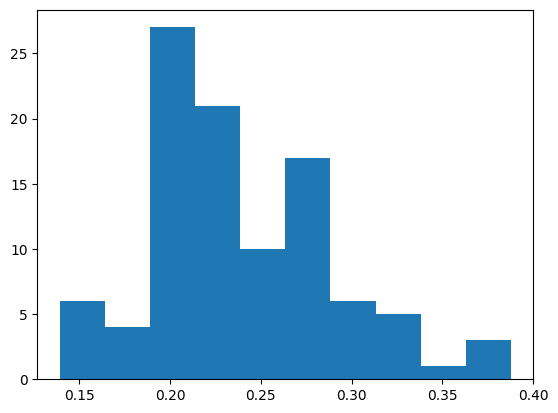

In [15]:
counts, bins, _ = plt.hist(cdf)
plt.show()
plt.close('all')

In [16]:
min(cdf), max(cdf)

(0.13932189372313333, 0.3876228716792928)

In [28]:
var = stats.multivariate_normal.rvs(mean=mu, cov=sigma, size=10)

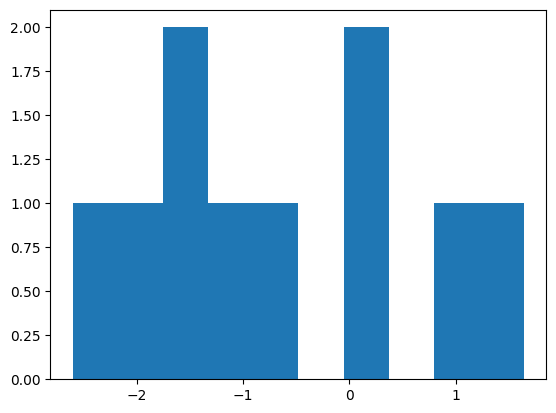

In [29]:
counts, bins, _ = plt.hist(var[:, 6])

In [42]:
x = var + 2
var2 = stats.multivariate_normal.cdf(x=x, mean=mu, cov=sigma)

In [43]:
var2

array([0.31915444, 0.12679304, 0.53522805, 0.43427013, 0.63471367,
       0.27025508, 0.49027817, 0.22429663, 0.09589531, 0.46240107])